Ash Rai
<br>CSC 675: Neural Networks and Deep Learning
<br> 01/28/2022

# **Deep Learning Project 1**



## Code / Implementation 

### Part 1: Hierarchical clustering



Initial loading of MNIST data and preprocessing inclusing sampling and reshaping

In [44]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Setup sample images and labels to limit size
numer_of_samples = 100
sample_images = train_images[:numer_of_samples]
sample_labels = train_labels[:numer_of_samples]

# Reshaping sample_images from 3d to 2d for clustering
sample_images = sample_images.reshape(numer_of_samples, 28 * 28)

Visualization of the clustering via a Dendrogram

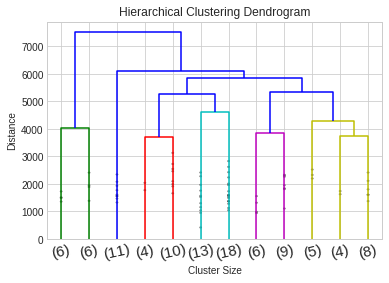

In [45]:
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage


# Setup parameters for clustering
linkage_type = 'ward'
affinity_type = 'euclidean'

z = linkage(sample_images, linkage_type)
plt.style.use('seaborn-whitegrid')

dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=12., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

Method to create cluster model and apply it to our sample

In [46]:
from sklearn.cluster import AgglomerativeClustering
 
def runAgglomerativeClustering(affinity_type, linkage_type, sample_images):
  cluster = AgglomerativeClustering(n_clusters=10, affinity=affinity_type, linkage=linkage_type)
  cluster.fit_predict(sample_images)
  return cluster

Mapping the cluster labels to actual predicted labels of the picture

In [47]:
# Method to process cluster labels and deduce the mapping, and use it to replace cluster labels with predicted labels

def process_predicted_labels(sample_labels, cluster, numer_of_samples):
  # Each index corresponds to the cluster label
  labels_count = [{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0} for k in range(10)]

  # Keep count of actual label for each sample on the cluster label index
  for i in range(numer_of_samples):
    actual_label = sample_labels[i]
    cluster_label = cluster.labels_[i]
    labels_count[cluster_label][actual_label] += 1

  # Use the highest frequency real label to be the mapped label for prediction
  label_mapping = {}
  for i in range(10):
    label_mapping[i] = max(labels_count[i], key=labels_count[i].get);

    ############################# Comment/uncomment to see the tally ##########################
    # print('For cluster label', i ,': The true labels count was', labels_count[i], 'with the most probable true label being:', max(labels_count[i], key=labels_count[i].get))

  #print('The label mapping ended up being:', label_mapping)

  # Use the mapping to create the 
  predicted_labels = []
  for i in cluster.labels_:
    predicted_labels.append(label_mapping.get(i))

  return predicted_labels

The method below will be used to generate the confusion matrix and produce the corresponding plot

In [48]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def draw_confusion_matrix(sample_labels, predicted_labels):
  cd_matrix = confusion_matrix(sample_labels, predicted_labels)
  
  plt.figure(figsize=(12,10))
  sn.heatmap(cd_matrix, annot=True)
  plt.title('Confusion Matrix for ' + str(numer_of_samples) + ' sample size')
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()


Applying all combinations of parameters for the clustering and comparing the accuracy

For Heirarchical Cluster of 100 samples, the following results were obtained

Linkage: ward 	Affinity: euclidean 	Accuracy: 0.7


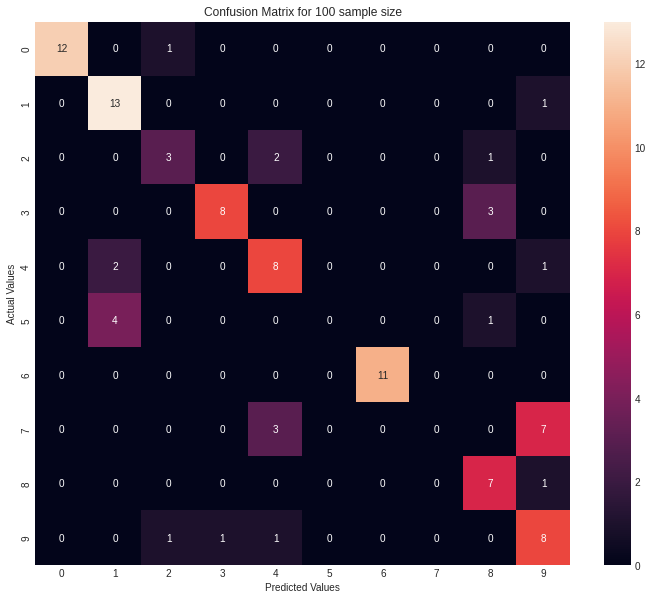


Linkage: complete 	Affinity: euclidean 	Accuracy: 0.51


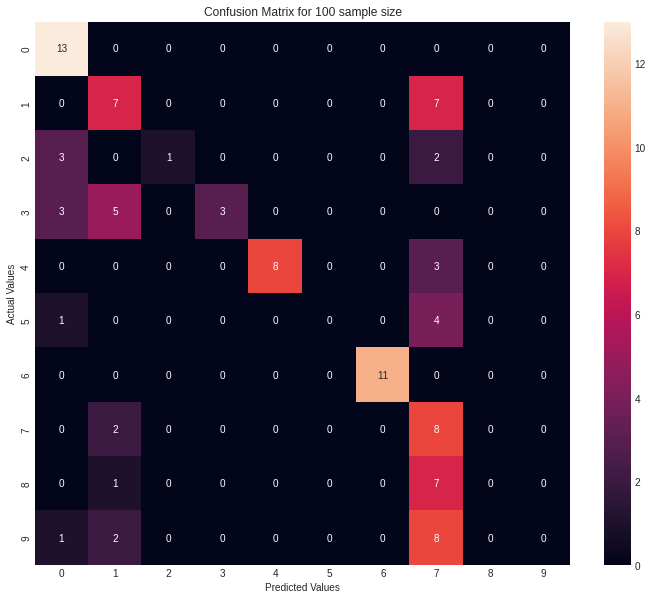


Linkage: complete 	Affinity: l1 	Accuracy: 0.49


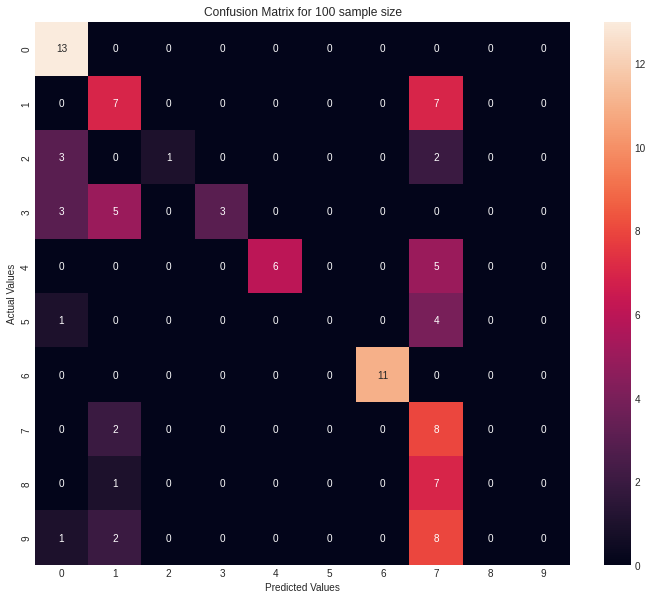


Linkage: complete 	Affinity: l2 	Accuracy: 0.51


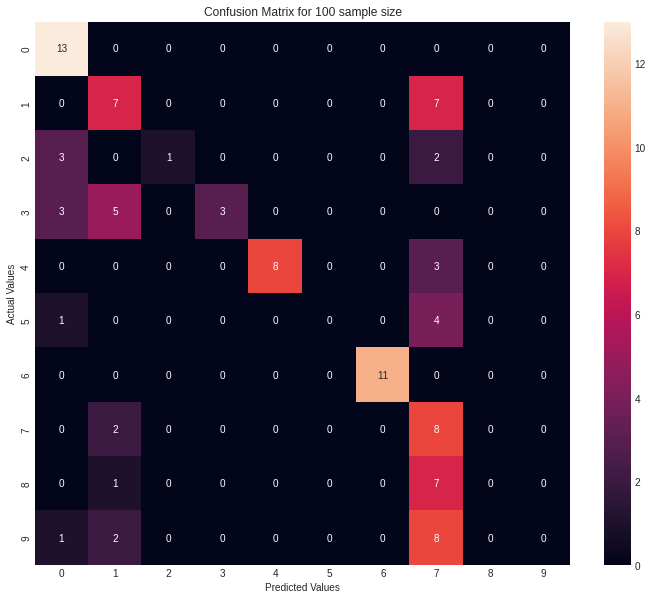


Linkage: complete 	Affinity: manhattan 	Accuracy: 0.49


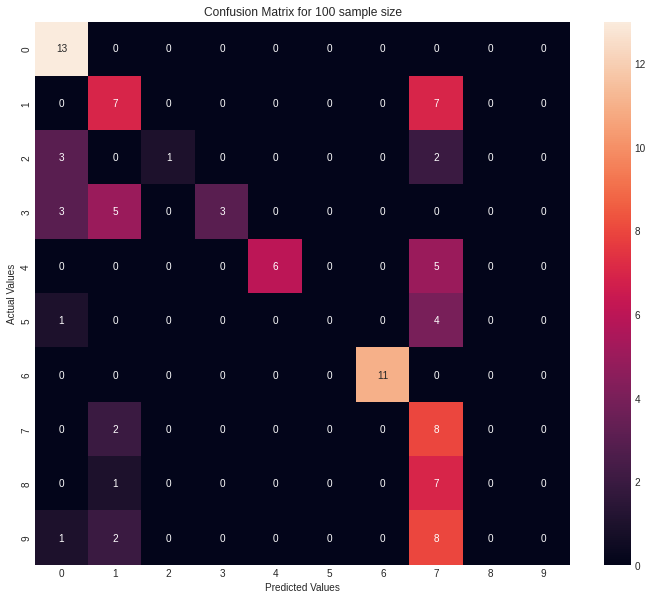


Linkage: complete 	Affinity: cosine 	Accuracy: 0.6


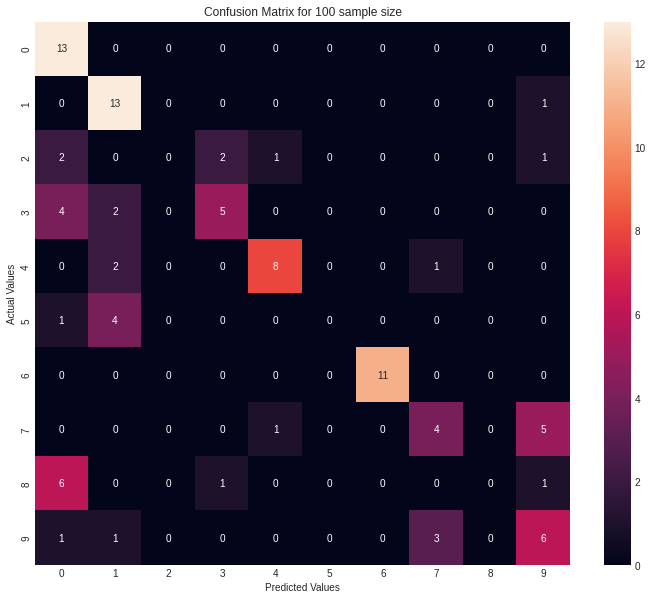


Linkage: average 	Affinity: euclidean 	Accuracy: 0.47


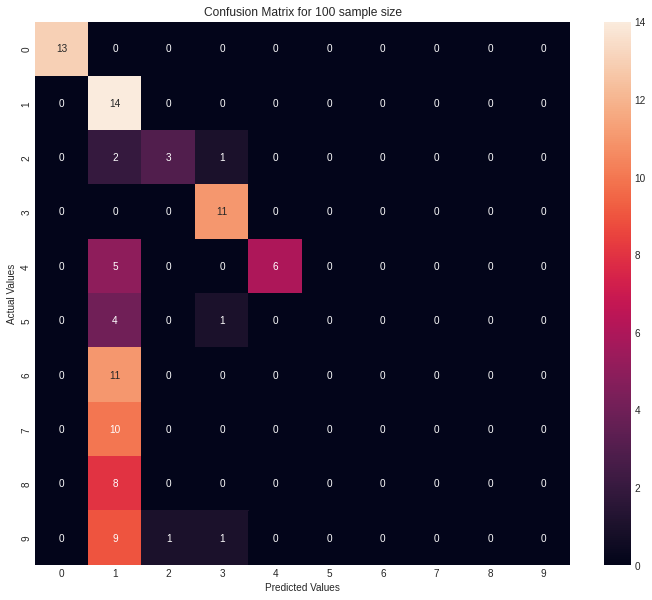


Linkage: average 	Affinity: l1 	Accuracy: 0.47


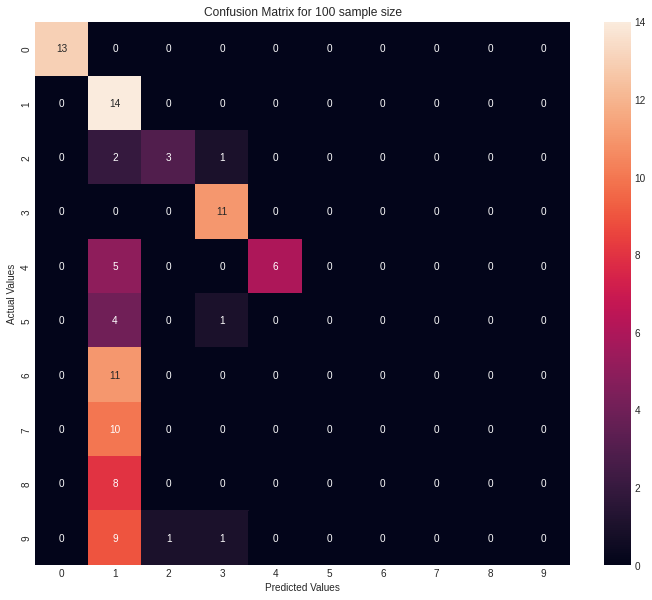


Linkage: average 	Affinity: l2 	Accuracy: 0.47


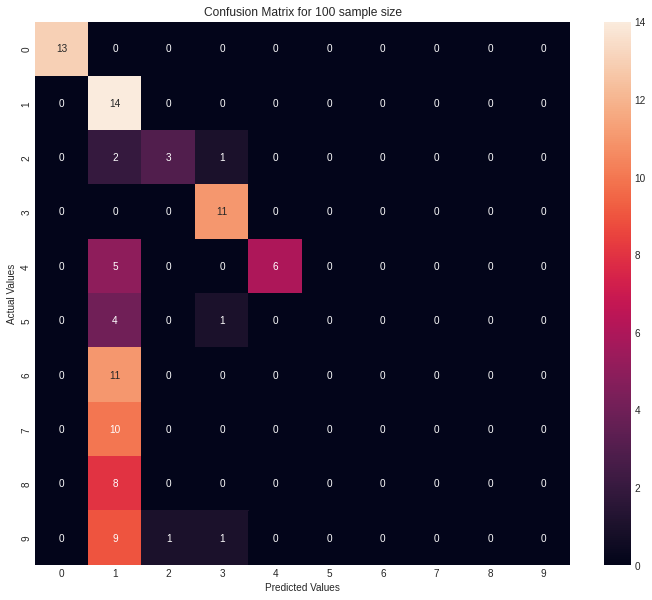


Linkage: average 	Affinity: manhattan 	Accuracy: 0.47


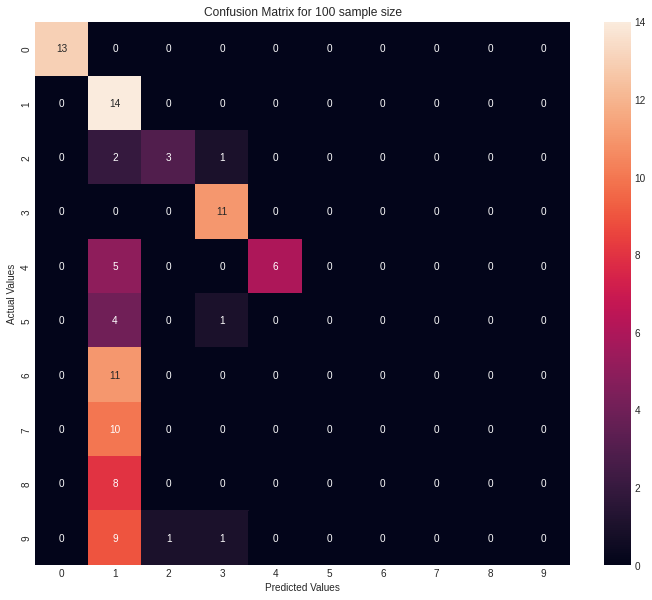


Linkage: average 	Affinity: cosine 	Accuracy: 0.41


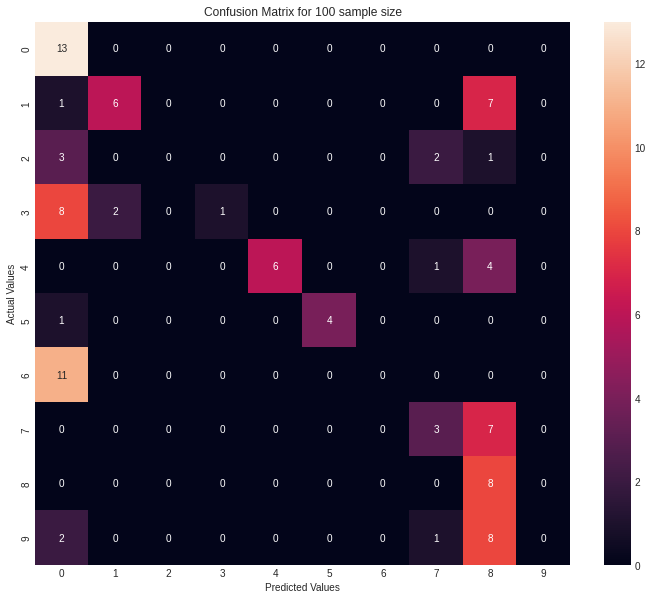


Linkage: single 	Affinity: euclidean 	Accuracy: 0.24


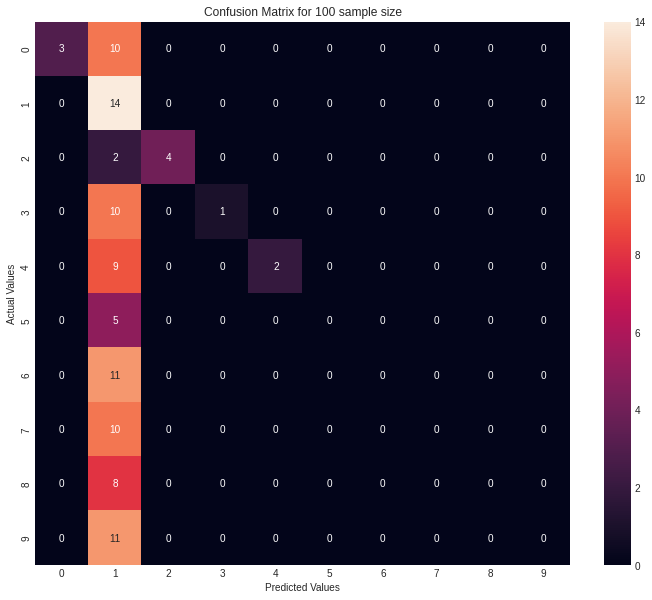


Linkage: single 	Affinity: l1 	Accuracy: 0.24


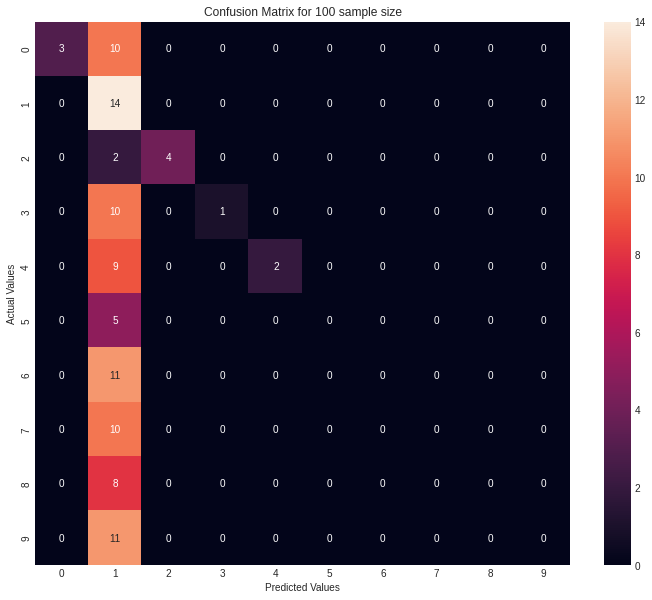


Linkage: single 	Affinity: l2 	Accuracy: 0.24


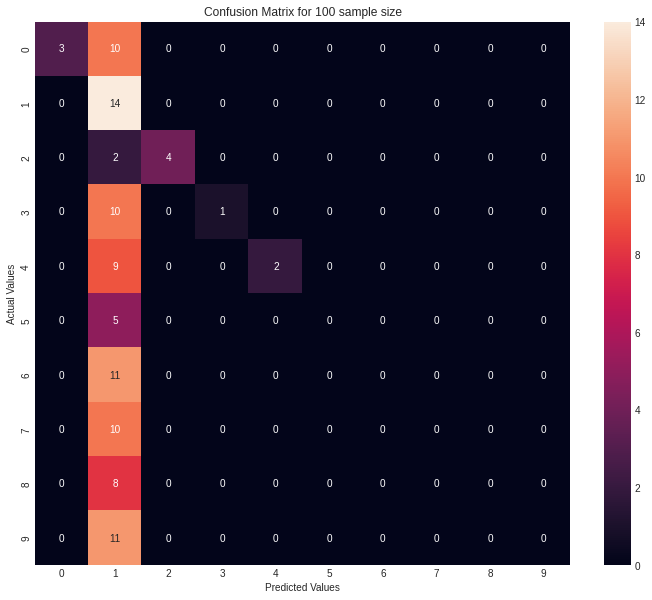


Linkage: single 	Affinity: manhattan 	Accuracy: 0.24


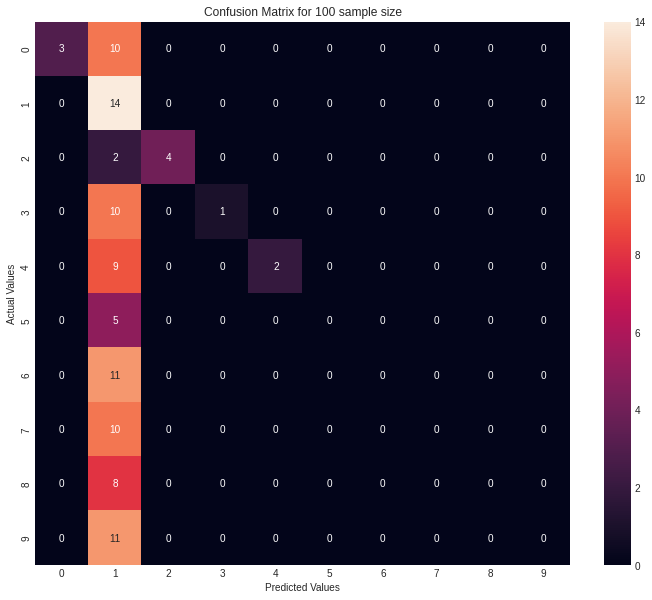


Linkage: single 	Affinity: cosine 	Accuracy: 0.23


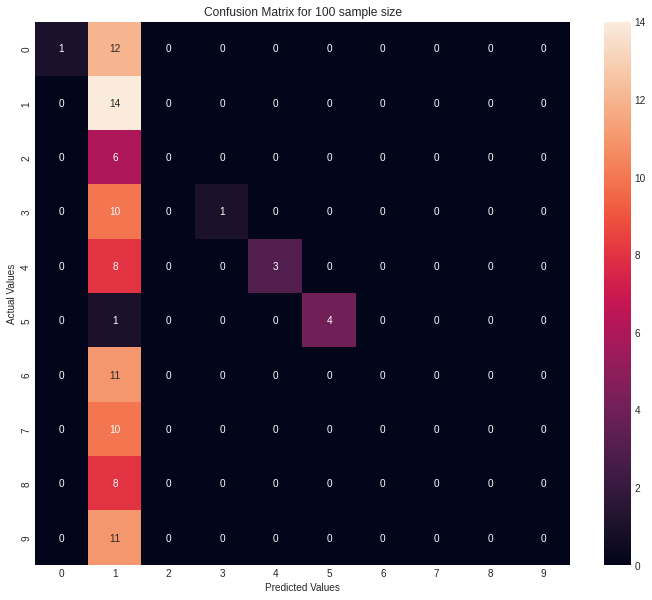

,Linkage,Affinity,Accuracy
1,ward,euclidean,0.70
6,complete,cosine,0.60
2,complete,euclidean,0.51
4,complete,l2,0.51
3,complete,l1,0.49
5,complete,manhattan,0.49
7,average,euclidean,0.47
8,average,l1,0.47
9,average,l2,0.47
10,average,manhattan,0.47


In [49]:
import sklearn.metrics as sm
import pandas as pd

print("For Heirarchical Cluster of", numer_of_samples, "samples, the following results were obtained\n")

# Pandas dataframe to store and view results
results = pd.DataFrame(columns=['Linkage', 'Affinity', 'Accuracy'])

# Special case since ward can only be applied with euclidean
cluster = runAgglomerativeClustering('euclidean', 'ward', sample_images)
predicted_labels = process_predicted_labels(sample_labels, cluster, numer_of_samples)
accuracy = sm.accuracy_score(sample_labels, predicted_labels)
results.loc[1] = ['ward', 'euclidean', accuracy]
print('Linkage: ward \tAffinity: euclidean \tAccuracy:', accuracy)
draw_confusion_matrix(sample_labels, predicted_labels)


 ################## Please comment/uncomment below for all combinations of affinity and linkage parameters ####################

# For other combinations, we will pair up all possible options
affinity_types = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkage_types = ['complete', 'average', 'single'] 

index = 2
for linkage_type in linkage_types:
  for affinity_type in affinity_types:
    cluster = runAgglomerativeClustering(affinity_type, linkage_type, sample_images)
    predicted_labels = process_predicted_labels(sample_labels, cluster, numer_of_samples)
    accuracy = sm.accuracy_score(sample_labels, predicted_labels)
    results.loc[index] = [linkage_type, affinity_type, accuracy]
    index += 1


    ########################## Please comment/uncomment below for confusion matrix visualization ########################## 
    print()
    print('Linkage:', linkage_type, '\tAffinity:', affinity_type, '\tAccuracy:', accuracy)
    draw_confusion_matrix(sample_labels, predicted_labels)


################################################################################################################
    

# Sorting combinations based on accuracy
results = results.sort_values('Accuracy', ascending=False)
results


### Part 2: K-Means Clustering

For K-Means Cluster of 100 samples, the following results were obtained


Algorithm: auto 	Init: k-means++ 	Accuracy: 0.67


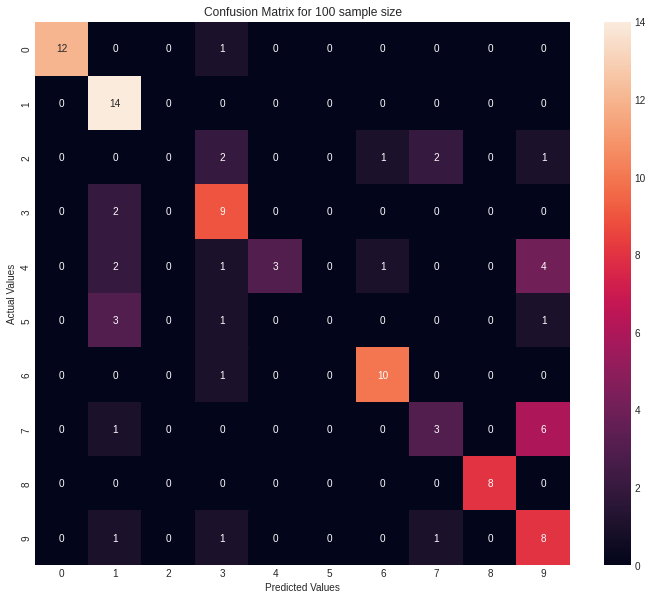


Algorithm: auto 	Init: random 	Accuracy: 0.64


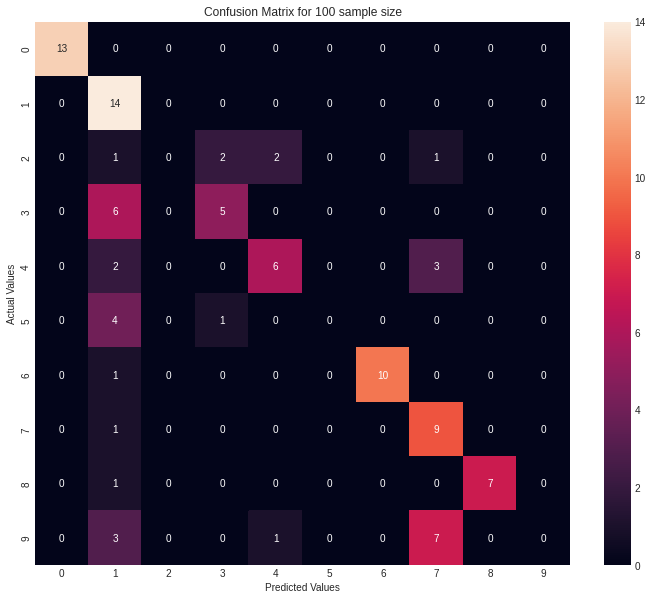


Algorithm: full 	Init: k-means++ 	Accuracy: 0.7


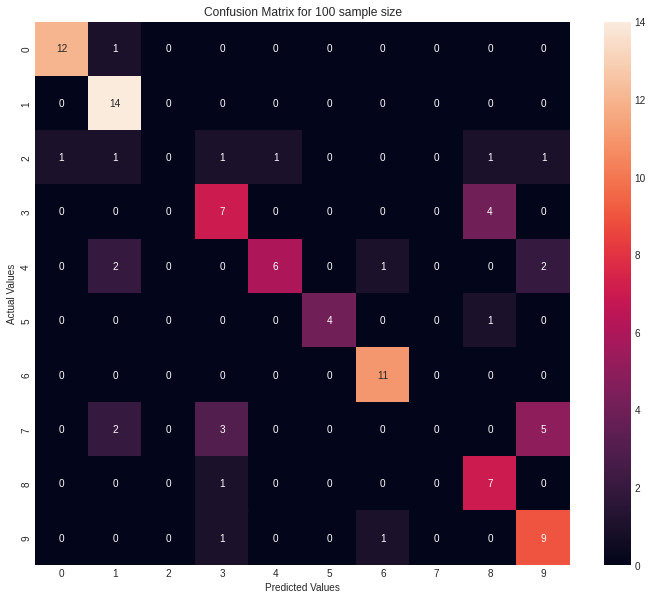


Algorithm: full 	Init: random 	Accuracy: 0.7


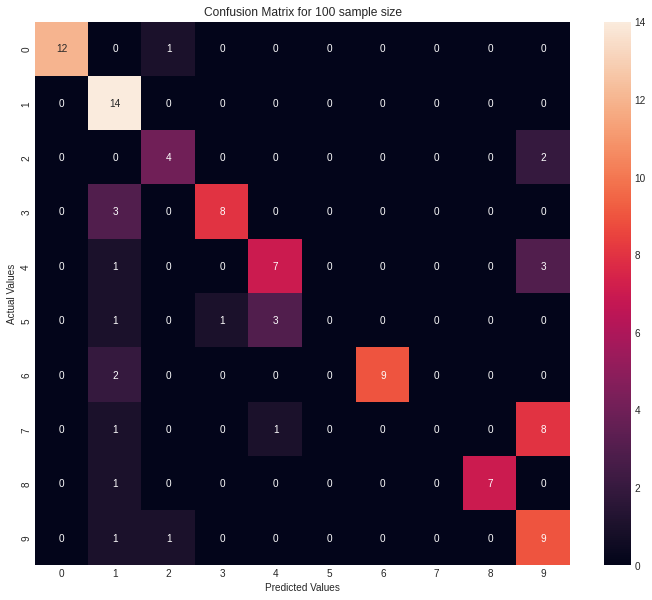


Algorithm: elkan 	Init: k-means++ 	Accuracy: 0.7


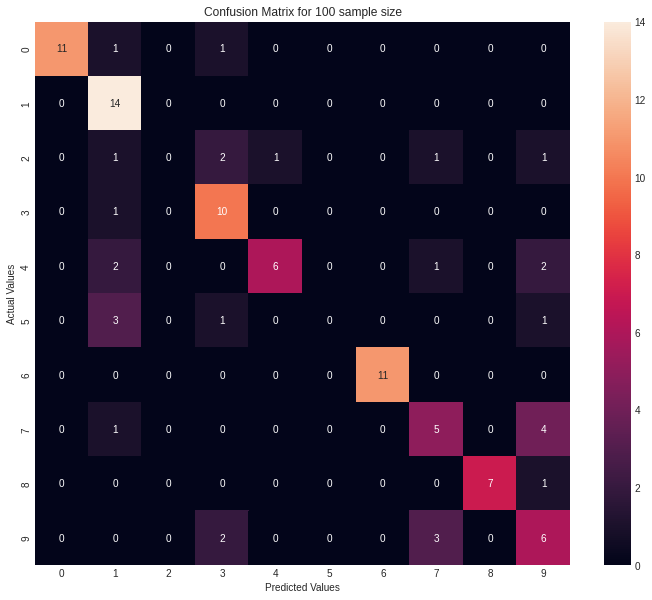


Algorithm: elkan 	Init: random 	Accuracy: 0.67


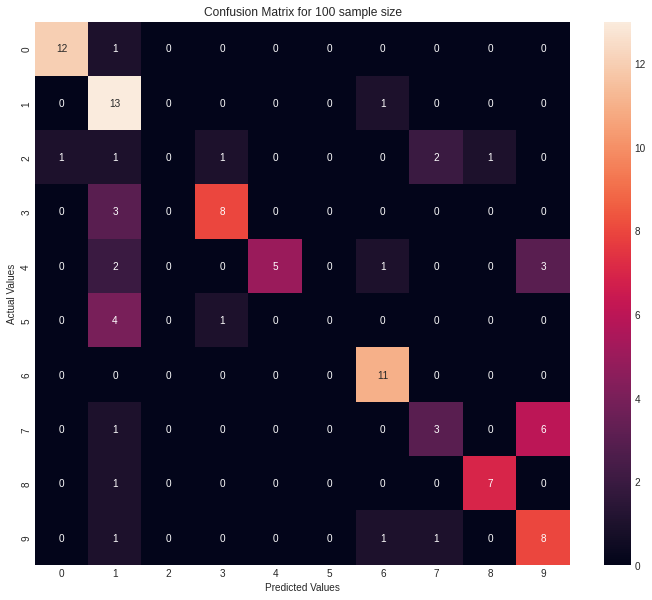

,Algorithm,Initialization,Accuracy
1,auto,k-means++,0.67
2,auto,random,0.64
3,full,k-means++,0.70
4,full,random,0.70
5,elkan,k-means++,0.70
6,elkan,random,0.67


In [50]:
from sklearn.cluster import KMeans
import pandas as pd
import sklearn.metrics as sm

print("For K-Means Cluster of", numer_of_samples, "samples, the following results were obtained\n")

# Pandas dataframe to store and view results
results_k_means = pd.DataFrame(columns=['Algorithm', 'Initialization', 'Accuracy'])

# Creating the K Means cluster model and applying it to our sample images
algorithm_types = ['auto', 'full', 'elkan']
init_types = ['k-means++', 'random']
index = 1


for algorithm_type in algorithm_types:
  for init_type in init_types:
    cluster_k_means = KMeans(n_clusters=10, algorithm=algorithm_type)
    cluster_k_means.fit_predict(sample_images)

    # Processing the cluster labels by mapping the cluster labels to real ones, and transforming the cluster labels to get predicted labels
    predicted_labels_kmeans = process_predicted_labels(sample_labels, cluster_k_means, numer_of_samples)

    accuracy = sm.accuracy_score(sample_labels, predicted_labels_kmeans)
    results_k_means.loc[index] = [algorithm_type, init_type, accuracy]
    index += 1
    
    ########################## Please comment/uncomment below for confusion matrix visualization ########################## 
    print()
    print('Algorithm:', algorithm_type, '\tInit:', init_type, '\tAccuracy:', accuracy)
    draw_confusion_matrix(sample_labels, predicted_labels_kmeans)
    
results_k_means


---

## Background

### Hierarchical clustering (Agglomerative)

Agglomerative clustering is a bottoms-up hierarchical clustering method. All the data points start initially as its own cluster. Then through a series of repititions of calculating similarity (distance) between the clusters, and combining the most similar clusters, we progress towards a single cluster.

Agglomerative clustering, at a higher level, consists of 4 main steps:


1.   Start with each observation point as its own cluster
2.   Calculate the similarity (distance) between each cluster
3.   Combine the most similar (close) clusters
4. Keep repeating steps 2 and 3 until we end up with the desired number of clusters




### K-Means clustering

K-Means clustering starts off with the desired number of clusters, represented by points called centroids. Centroids are the data points that represent the center of the relevant cluster. This is in contrast to agglomerative clustering, where we start with each data point as a cluster itself. The clustering process itself consists of 2 repeated set of steps called expectation and maximization. During expectation, each data point is assigned to its nearest centroid and during maximization the new centroid is computed.

K-Means clustering, at a higher level, consists of 4 main steps as well:

1. Start by specifying and assigning the desired number of cluster centroids (k)
2. Expectation - Assign each point to the closest centroid
3. Maximization - Compute the new centroid for each cluster
4. Keep repeating steps 2 and 3 until the centroids do not change


### Comparison

Agglomerative clustering begins off with all observation points acting as a cluster and eventually merge to converge towards the desired number of clusters. K-Means on the other hand, begins with the fixed desired number of clusters. They seem to be similay in their nature of iteratively repeating 2 main steps involving measuring the distance to optimize proximity, and optimizing the model itself by manipulating the clusters. The specifics of these steps vary quite a bit of course as described above.



---



## Methodology

### Heirarchical Clustering

Agglomerative clustering was chosen as the heirarchical clustering method. There were 2 main parameters that were varied in the process:

<ol>
  <li> Linkage - This parameter determines how the distance between two clusters are measured. There are four types of linkage provided:
  <ul>
    <li> ward: the variance of the clusters being merged is minimized
    <li> average: distances between each data points of the two clusters are averaged
    <li> complete: maximum distance between the data points of the two clusters
    <li> single: minimum distance between the data points of the two clusters
  </ul> 
  <li> Affinity - This parameter specifies the similarity metric used to compute the linkage. For our purpose, there were five types applicable:
    <ul>
      <li>euclidean
      <li>l1
      <li>l2
      <li>manhattan
      <li>cosine
    </ul>
</ol>

All the combinations of the linkage and affinity were applied, with the exception of 'ward' only being applied with 'euclidean'. It is the only affinity parameter allowed when the linkage is assigned as 'ward'.

### K-Means Clustering

K-Means clustering had two parameters that was varied during the runs as well. There were three types of algorithm that were used, along with two types of initialization for the clusters

<ol>
  <li> Initialization - This determines how the initial cluster points are chosen.
    <ul>
      <li>k-means++: biased random sampling meant to be 'smarter' and quicker to converge
      <li>random: random cluster points chosen for intilization
    </ul>
  <li> Algorithm - The k-means algorithm chosen for the simulation
    <ul>
      <li>auto
      <li>full
      <li>elkan
    </ul>
</ol>

All the combinations of the initialization and algorithm types wqere applied to the K-means clustering model.

### Sampling

Three different sample sizes, with two different batches for each size were run. The distribution of the numbers, looking at the sample label, seemed to be random. Hence, I collected the samples that were in series (i.e. in subsequent indices) in the data set. However, I did alter the start index, covering a different data point for each run for a given sample size. It can be noted that the 2 runs of 30000 samples, covered the full training dataset of 60000 data points.

<table>
	<tr>
		<th>Sample Size</th>
		<th>Run 1 Index</th>
    <th>Run 2 Index</th>
 	</tr>
 	<tr>
      <td>1000</td>
  		<td>0 : 9</td>
   		<td>10 : 19</td>
 	</tr>
  <tr>
  		<td>10000</td>
   		<td>0 : 9999</td>
      <td>10000 : 19999</td>
 	</tr>
    <tr>
  		<td>20000</td>
   		<td>0 : 19999</td>
      <td>20000 : 39999</td>
 	</tr>
    <tr>
  		<td>30000</td>
   		<td>0 : 29999</td>
      <td>30000 : 59999</td>
 	</tr>
</table>


### Cluster Label to Predicted Label Mapping

Since the label that the clusters are assigned are abritrary and does not necessarily map to the actual labels of predicted values, some sort of mapping is needed from cluster label to predicted label. For this, I implemented the following process to assign the values.

1. For each cluster, go through all the data points and observe what the true label value is. Keep a tally of each digit.
2. Observe what is the highest count for the true label values in the cluster.
3. Assign that to be the predicted label for that cluster.

---





## Results

### Heirarchical Clustering

#### Accuracy (In context of parameter combinations)

The accuracy measured using the accuracy_score() is presented below for the sample size of 10,000 data points and the different combination of linkage and affinity used. This was the best batch/run in terms of accuracy.

<table>
	<tr>
		<th>Linkage</th>
		<th>Affinity</th>
		<th>Accuracy</th>
 	</tr>
 	<tr>
  		<td>ward</td>
   		<td>euclidean</td>
			<td>0.696</td>
 	</tr>
	 	<tr>
  		<td>complete</td>
   		<td>euclidean</td>
			<td>0.411</td>
 	</tr>
	<tr>
  		<td>complete</td>
   		<td>l2</td>
			<td>0.411</td>
 	</tr>
	 	<tr>
  		<td>complete</td>
   		<td>cosine</td>
			<td>0.385</td>
 	</tr>
	<tr>
  		<td>complete</td>
   		<td>l1</td>
			<td>0.365</td>
 	</tr>
	<tr>
  		<td>complete</td>
   		<td>manhattan</td>
			<td>0.365</td>
 	</tr>
	 	<tr>
  		<td>average</td>
   		<td>euclidean</td>
			<td>0.230</td>
 	</tr>
	 	<tr>
  		<td>average</td>
   		<td>l2</td>
			<td>0.230</td>
 	</tr>
		 	<tr>
  		<td>average</td>
   		<td>l1</td>
			<td>0.229</td>
 	</tr>
	<tr>
  		<td>average</td>
   		<td>cosine</td>
			<td>0.222</td>
 	</tr>
	<tr>
  		<td>single</td>
   		<td>euclidean</td>
			<td>0.114</td>
 	</tr>
	 	<tr>
  		<td>single</td>
   		<td>l1</td>
			<td>0.114</td>
 	</tr>
	 	<tr>
  		<td>single</td>
   		<td>l2</td>
			<td>0.114</td>
 	</tr>
	 	<tr>
  		<td>single</td>
   		<td>manhattan</td>
			<td>0.114</td>
 	</tr>
	 	<tr>
  		<td>single</td>
   		<td>cosine</td>
			<td>0.114</td>
 	</tr>
</table>

#### Accuracy (In context of varying sample sizes)

It semed like the combination of 'euclidean' and 'ward' far outperformed the other combination. Hence, I chose to conduct another run with a bigger sample size with this combination. The accuracy for different sample sizes, for this combination is provided below.

<table>
	<tr>
		<th>Sample Size</th>
		<th>Best Accuracy</th>
 	</tr>
 	<tr>
  		<td>1000</td>
   		<td>0.571</td>
 	</tr>
  <tr>
  		<td>10000</td>
   		<td>0.696</td>
 	</tr>
  <tr>
  		<td>20000</td>
   		<td>0.671</td>
 	</tr>
	<tr>
  		<td>30000</td>
   		<td>0.696</td>
 	</tr>
</table>

#### Time Evaluation

For each sample size, I ran the simulations two times. The runtimes have been listed in the table below. The runtimes are the cumulative runtime for all the combinations (i.e. sixteen different combinations listed above in the accuracy table). For 20000 sample size, only times for the combination of 'ward' and 'euclidean' has been included.

<table>
	<tr>
		<th>Sample Size</th>
		<th>Run 1 (Sample 1)</th>
    <th>Run 2 (Sample 2)</th>
 	</tr>
 	<tr>
  		<td>1000</td>
   		<td>14 s</td>
      <td>16 s</td>
 	</tr>
  <tr>
  		<td>10000</td>
   		<td>12 m 32 s</td>
      <td>12 m 55 s</td>
 	</tr>
	   <tr>
  		<td>20000 (Only 'ward' x 'euclidean')</td>
   		<td>3 m 28 s</td>
      <td>3 m 18 s</td>
 	</tr>
	 	  <tr>
  		<td>30000 (Only 'ward' x 'euclidean')</td>
   		<td>8 m 47 s</td>
      <td>8 m 56 s</td>
 	</tr>
</table>

### Confusion Matrix

The confusion matrix for the the sample size of 30000 is presented below.

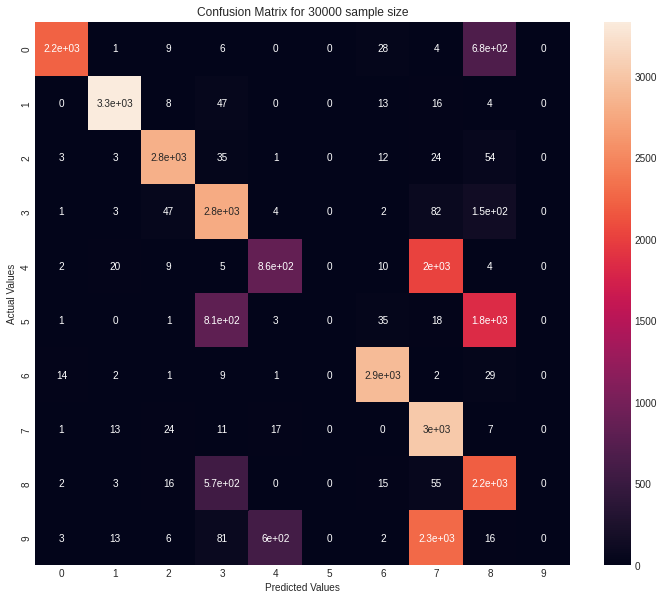

In [43]:
draw_confusion_matrix(sample_labels, predicted_labels)

### K-Means Clustering

#### Accuracy (In context of parameter combinations)

The accuracy measured using the accuracy_score() is presented below for the sample size of 10,000 data points and the different combinations of initialization and algorithm parameters. This was the best batch/run in terms of accuracy.

<table>
	<tr>
		<th>Initialization</th>
		<th>Algorithm</th>
		<th>Accuracy</th>
 	</tr>
 	<tr>
  		<td>random</td>
   		<td>full</td>
			<td>0.577</td>
 	</tr>
	 	<tr>
  		<td>k-means++</td>
   		<td>full</td>
			<td>0.568</td>
 	</tr>
	<tr>
  		<td>k-means++</td>
   		<td>elkan</td>
			<td>0.568</td>
 	</tr>
	 	<tr>
  		<td>k-means++</td>
   		<td>auto</td>
			<td>0.568</td>
 	</tr>
	<tr>
  		<td>random</td>
   		<td>elkan</td>
			<td>0.567</td>
 	</tr>
	<tr>
  		<td>random</td>
   		<td>auto</td>
			<td>0.566</td>
 	</tr>
</table>

#### Accuracy (In context of varying sample sizes)

It semed like the combination of 'full' algorithm and 'random' initialization marginally outperformed the other combination for my runs of sample size of 10000. Hence, I chose to conduct another run with a bigger sample size with this combination. The accuracy for different sample sizes, for this combination is provided below.

<table>
	<tr>
		<th>Sample Size</th>
		<th>Best Accuracy</th>
 	</tr>
 	<tr>
  		<td>1000</td>
   		<td>0.624</td>
 	</tr>
  <tr>
  		<td>10000</td>
   		<td>0.577</td>
 	</tr>
  <tr>
  		<td>20000</td>
   		<td>0.571</td>
 	</tr>
	<tr>
  		<td>30000</td>
   		<td>0.575</td>
 	</tr>
</table>


#### Time Evaluation

For each sample size, I ran the simulations two times. The runtimes have been listed in the table below. The runtimes are the cumulative runtime for all the combinations (i.e. six different combinations listed above in the accuracy table). For 20000 sample size onwards, only times for the combination of 'random' initialzation and 'full' algorithm has been included.

<table>
	<tr>
		<th>Sample Size</th>
		<th>Run 1 (Sample 1)</th>
    <th>Run 2 (Sample 2)</th>
 	</tr>
 	<tr>
  		<td>1000</td>
   		<td>15 s</td>
      <td>16 s</td>
 	</tr>
  <tr>
  		<td>10000</td>
   		<td>1m 50 s</td>
      <td>1m 59s</td>
 	</tr>
	   <tr>
  		<td>20000 (Only 'random' x 'full')</td>
   		<td>35 s</td>
      <td>35 s</td>
 	</tr>
	 	  <tr>
  		<td>30000 (Only 'random' x 'full')</td>
   		<td>1 m 01 s</td>
      <td>59 s</td>
 	</tr>
</table>

### Confusion Matrix

The confusion matrix for the the sample size of 30000 is presented below.


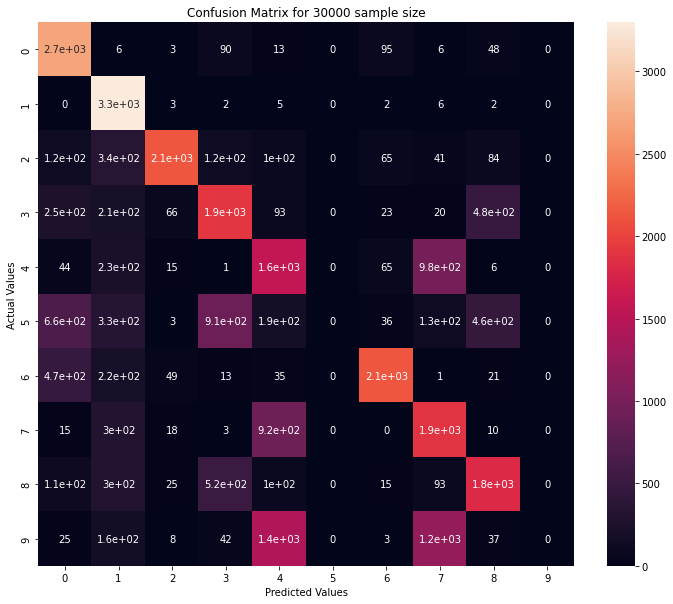

In [22]:
draw_confusion_matrix(sample_labels, predicted_labels_kmeans)

---

## Analysis and Discussion



*   In terms of accuracy, the heirarchical clustering approach seemed to outperform k-means clustering. This is especially more apparent in bigger sample sizes (i.e. larger than 10000 data points). Heirarchical clustering model seemed to edge towards 70% accuracy while k-means clustering model could not break past 60% accuracy.
*   Scaling sample size upwards seemed to benefit heirarchical clustering. Bigger data sets produced better accuracy. However, this was not the case for k-means clustering. Regardless of the sample size, the accuracy seemed to hover right around 60%. In fact, the highest accuracy I observed for k-means clustering was for the smallest sample size of 1000 (62% accuracy).
*   Heirarchical clustering seemed to take longer than k-means clustering by quite a bit. For the largest sample size of 30000, heirarchical clustering was longer by about 9 times compared to k-means clustering (about 9 minutes vs 1 minute).
*   The confusion matrix is quite insightful in terms of how much the models struggle with identifying each digit. For both the models, 1 seemed to be the best digit in terms of performace. The relative successful prediction is very high since it is fairly unique in terms of how it looks compared to other digits. On the other hand, digits that look more similar seem to be mislabelled quite a bit. Some examples of this are 8 vs 3, 9 vs 4 and 5 vs 8.
*  Related to the confusion matrix, I also noticed that the confusion matrix is 'cleaner' for heirarchical clustering compared to k-means clustering with fewer mislabelling, which seems to go hand in hand with the higher accuracy.
*   One major issue I ran into was the cluster label to predicted label mapping. My models consistently missed out on the predicted labels of 9 and 5. This caused the relationship to be 2 to 1 instead of 1 to 1 for my cluster to predicted label mapping. I looked into the mapping process, which is presented below. The mapping details including the tally for true image labels, provide us the insight on this mislabelling issue.<br>
For analysis purpose, let us look at why 9 is missing. It seems that the images for 9 are getting largely split into 2 other predicted labels: 7 and 4. The confusion matrix also depicts this, with 9 being clustered with 7 and 4 almost evenly. This has 2 implications. Firstly, there ends up being no cluster where 9 is dominant as it gets split. Secondly, despite the large occurence, there are other digits more dominant in these clusters so 9 gets mislabelled. For instance, in cluster label 5 below, there are 998 images of 9. However, since there are 1108 images of 7, the cluster gets assigned to be the predicted value of 7 as it is more present. This happens in 3 different clusters with 9, where the cluster has a significant number of images of 9, but another digit as the dominant image. Hence, there ends up no clusters assigned to the predicted value of 9.



In [19]:
import collections
predicted_labels = process_predicted_labels(sample_labels, cluster, numer_of_samples)

For cluster label 0 : The true labels count was {0: 28, 1: 13, 2: 12, 3: 2, 4: 10, 5: 35, 6: 2917, 7: 0, 8: 15, 9: 2} with the most probable true label being: 6
For cluster label 1 : The true labels count was {0: 681, 1: 4, 2: 54, 3: 147, 4: 4, 5: 1841, 6: 29, 7: 7, 8: 2213, 9: 16} with the most probable true label being: 8
For cluster label 2 : The true labels count was {0: 2232, 1: 0, 2: 3, 3: 1, 4: 2, 5: 1, 6: 14, 7: 1, 8: 2, 9: 3} with the most probable true label being: 0
For cluster label 3 : The true labels count was {0: 3, 1: 10, 2: 14, 3: 75, 4: 1087, 5: 15, 6: 1, 7: 1926, 8: 17, 9: 1285} with the most probable true label being: 7
For cluster label 4 : The true labels count was {0: 0, 1: 1835, 2: 1, 3: 1, 4: 5, 5: 0, 6: 2, 7: 5, 8: 2, 9: 4} with the most probable true label being: 1
For cluster label 5 : The true labels count was {0: 1, 1: 6, 2: 10, 3: 7, 4: 934, 5: 3, 6: 1, 7: 1108, 8: 38, 9: 998} with the most probable true label being: 7
For cluster label 6 : The true label